## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [25]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [4]:
def remove_correlated_features(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

In [48]:
# makes a copy for backup
df = absent.copy()

In [49]:
# removing correlated variables
remove_correlated_features(df, 0.8)

Deleted Body mass index from dataset.


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,0


In [50]:
# dropping ID
df.drop('ID', axis=1, inplace=True)
df.dropna(inplace=True)

In [51]:
df.isnull().mean()

Reason for absence                 0.0
Month of absence                   0.0
Day of the week                    0.0
Seasons                            0.0
Transportation expense             0.0
Distance from Residence to Work    0.0
Service time                       0.0
Age                                0.0
Work load Average/day              0.0
Hit target                         0.0
Disciplinary failure               0.0
Education                          0.0
Son                                0.0
Social drinker                     0.0
Social smoker                      0.0
Pet                                0.0
Weight                             0.0
Height                             0.0
Absenteeism time in hours          0.0
dtype: float64

In [56]:
# train-test split
X = df.drop(['Absenteeism time in hours', 'Weight', 'Age', 'Month of absence'], 
            axis=1)
Y = df['Absenteeism time in hours']

X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.2)

In [53]:
X.columns

Index(['Reason for absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Height'],
      dtype='object')

Scale the independent variables using the standard scaler

In [57]:
# scaling numerical and encoding categorical variables
num = ['Transportation expense', 'Distance from Residence to Work', 
       'Service time', 'Work load Average/day ', 'Hit target',
       'Height', 'Son', 'Pet']
cat = ['Reason for absence', 'Day of the week', 'Seasons',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker']

scaler = StandardScaler()
onehot = OneHotEncoder(drop='first', sparse=False)

preproc = ColumnTransformer(transformers=[('num', scaler, num),
                                          ('cat', onehot, cat)])

X_tr_ = preproc.fit_transform(X_tr)
X_te_ = preproc.transform(X_te)

Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [58]:
svr_linear = SVR(kernel='linear', C=1, epsilon=0.1, gamma='auto')
svr_linear.fit(X_tr_, y_tr)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
print(f'SVR Linear Train score: {svr_linear.score(X_tr_, y_tr)}')
print(f'SVR Linear Test score: {svr_linear.score(X_te_, y_te)}')

SVR Linear Train score: 0.08306337697879396
SVR Linear Test score: 0.07031338807205367


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [60]:
parameters = {'kernel':('linear', 'poly', 'rbf'), 'C':[1, 10, 100]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_tr_, y_tr)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100],
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
clf.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [62]:
clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [63]:
print(f'Best train score: {clf.score(X_tr_, y_tr)}')
print(f'Best test score: {clf.score(X_te_, y_te)}')

Best train score: 0.4831568418251211
Best test score: 0.06623852883531045


In [64]:
y_pr1 = clf.predict(X_tr_)
y_pr2 = clf.predict(X_te_)
err = y_tr - y_pr1
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_tr, y_pr1))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_te, y_pr2))}')

Train RMSE: 9.824325282690094
Test RMSE: 11.414204606532657


Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

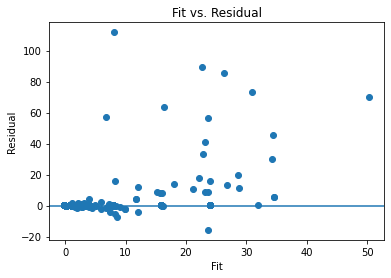

In [65]:
plt.scatter(y_pr1, err)
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Fit vs. Residual')
plt.show()

*On the low end, SVR is very similar to KNN for variances but fails to maintain homoscedasticity early on. Even with scaling and onehot encoding, it seems like the data needs more EDA than what is done. The plots look somewhat similar with the KNN regression model considering that rbf is similar to KNN behaviour-wise.*